# Filtragem Espacial
## A. Implementar a operação de convolução utilizando OPENCV, scipy função convolve e implementação manual.
## B. Implementar seguintes máscaras:
   - Média
   - Gaussiano
   - Laplaciano
   - Sobel X
   - Sobel Y
   - Gradiente (Sobel X + Sobel Y)
   - Laplaciano somado a imagem original

## Importando bibliotecas

In [91]:
import numpy as np
from numpy import asarray
from PIL import Image, ImageFilter
import cv2
from scipy.signal import convolve2d, medfilt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

## Máscaras de convolução

### masks(title) :: void
função responsável por aplicar as máscaras de convolução na imagem original de acordo com o título passado como parâmetro.


In [92]:
def masks(title):
    if title.lower() == 'identidade':
        return np.array((
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]), dtype="int")
    elif title.lower() == 'média':
        return np.array((
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]), dtype="float")
    elif title.lower() == 'gauss':
        return np.array((
        [0.0625, 0.125, 0.0625], 
        [0.1250, 0.250, 0.1250],
        [0.0625, 0.125, 0.0625]), dtype="float")
    elif title.lower() == 'laplaciano':
        return np.array((
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]), dtype="int")
    elif title.lower() == 'sobelx':
        return np.array((
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]), dtype="int")
    elif title.lower() == 'sobely':
        return np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]), dtype="int")
    elif title.lower() == 'prewittx':
        return np.array((
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]), dtype="int")
    elif title.lower() == 'prewitty':
        return np.array((
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]), dtype="int")
    elif title.lower() == 'robertsx':
        return np.array((
        [0, 0, 0],
        [0, 0, 1],
        [0,-1, 0]), dtype="int")
    elif title.lower() == 'robertsy':
        return np.array((
        [0, 0, 0],
        [0, 1, 0],
        [0, 0,-1]), dtype="int")
    elif title.lower() == 'boost':
        return np.array((
        [ 0,  -1,  0],
        [-1, 5.7, -1],
        [ 0,  -1,  0]), dtype="float")
    else:
        return np.array((
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]), dtype="int")

### print_final_result() :: void
função responsável por mostrar o resultado final da imagem através da biblioteca matplotlib e aplicar as transformações geométricas na imagem original.

In [93]:
def print_final_result(img_path1, img_path2, img_path3, mask_title, function,lib, kernel_size = 3):
    if lib.lower() == 'opencv':
        imgBiel = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
        imgLena = cv2.imread(img_path2, cv2.IMREAD_GRAYSCALE)
        imgCameraman = cv2.imread(img_path3, cv2.IMREAD_GRAYSCALE)
    else:
        imgBiel = Image.open(img_path1)
        f_imgBiel = asarray(imgBiel)
        imgLena = Image.open(img_path2)
        f_imgLena = asarray(imgLena)
        imgCameraman = Image.open(img_path3)
        f_imgCameraman = asarray(imgCameraman)

    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    
    plt.figure(figsize=(24, 12))
    plt4 = plt.subplot(2,3,1)
    plt5 = plt.subplot(2,3,2)
    plt6 = plt.subplot(2,3,3)
    plt1 = plt.subplot(2,3,4)
    plt2 = plt.subplot(2,3,5)
    plt3 = plt.subplot(2,3,6)
    
    plt4.set_title('Original Biel')
    plt5.set_title('Original Lena')
    plt6.set_title('Original Cameraman')
    
    mascara = masks(mask_title)
    if mascara != 'Máscara não encontrada':
        if (lib.lower() == 'opencv'):
            plt1.imshow(function(imgBiel, mascara), cmap='gray', vmin=0, vmax=255)
            plt2.imshow(function(imgLena, mascara), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(imgCameraman, mascara), cmap='gray', vmin=0, vmax=255)
            plt4.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
            plt5.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
            plt6.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
            
        elif (lib.lower() == 'scipy'):
            plt1.imshow(function(f_imgBiel, mascara), cmap='gray', vmin=0, vmax=255)
            plt2.imshow(function(f_imgLena, mascara), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgCameraman, mascara), cmap='gray', vmin=0, vmax=255)
            plt4.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
            plt5.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
            plt6.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
        
        elif (lib.lower() == 'manual'):
            plt1.imshow(function(f_imgBiel, mascara), cmap='gray', vmin=0, vmax=255)
            plt2.imshow(function(f_imgLena, mascara), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgCameraman, mascara), cmap='gray', vmin=0, vmax=255)
            plt4.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
            plt5.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
            plt6.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
        else:
            print('Biblioteca não encontrada')
    else:
        print('Máscara não encontrada')
    print(mask_title.upper())
    plt.show()
    
    print()

## A. Convolução utilizando OPENCV:

In [94]:
#convolution using opencv
#kernel example
#kernel = np.ones((3,3),np.float32)/9
#laplaciano 
# kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
def convolution_opencv(img, kernel):
    return cv2.filter2D(img, -1, kernel)

## A. Convolução utilizando Scipy:

In [95]:
#convolution using scipy
def convolution_scipy(img, kernel):
    img = np.array(img)
    kernel = np.array(kernel)
    return convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)



# A. Convolução utilizando implementação manual:

In [96]:
def convolution_manual(img, kernel):
    # Obter as dimensões da imagem e do kernel
    altura_imagem, largura_imagem = img.shape
    altura_kernel, largura_kernel = kernel.shape

    # Calcular o tamanho da imagem resultante
    altura_resultante = altura_imagem - altura_kernel + 1
    largura_resultante = largura_imagem - largura_kernel + 1

    # Inicializar a matriz da imagem resultante
    imagem_resultante = np.zeros((altura_resultante, largura_resultante))

    # Realizar a convolução manualmente
    for i in range(altura_resultante):
        for j in range(largura_resultante):
            janela = img[i:i+altura_kernel, j:j+largura_kernel]
            convolucao = np.sum(janela * kernel)
            imagem_resultante[i, j] = convolucao

    return imagem_resultante

## B. Implementar seguintes máscaras utilizando a operação de convolução utilizando, separadamente, OpenCV, Scipy e implementação manual:
- Média
- Gaussiano
- Laplaciano
- Sobel X
- Sobel Y
- Gradiente (Sobel X + Sobel Y)
- Laplaciano somado a imagem original

### gradiente_opencv() :: void
função responsável por aplicar o filtro de gradiente (Sobel X + Sobel Y) na imagem original utilizando a biblioteca OPENCV.

### gradiente_scipy() :: void
função responsável por aplicar o filtro de gradiente (Sobel X + Sobel Y) na imagem original utilizando a biblioteca Scipy.

### gradiente_manual() :: void
função responsável por aplicar o filtro de gradiente (Sobel X + Sobel Y) na imagem original utilizando a implementação manual.

In [97]:
def gradiente_opencv(img):
    imgBiel = cv2.imread(img[0], cv2.IMREAD_GRAYSCALE)
    imgLena = cv2.imread(img[1], cv2.IMREAD_GRAYSCALE)
    imgCameraman = cv2.imread(img[2], cv2.IMREAD_GRAYSCALE)
    kernelx = masks('sobelx')
    kernely = masks('sobely')
    imgxBiel = convolution_opencv(imgBiel, kernelx)
    imgyBiel = convolution_opencv(imgBiel, kernely)
    imgxLena = convolution_opencv(imgLena, kernelx)
    imgyLena = convolution_opencv(imgLena, kernely)
    imgxCameraman = convolution_opencv(imgCameraman, kernelx)
    imgyCameraman = convolution_opencv(imgCameraman, kernely)
    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    
    plt.figure(figsize=(24, 12))
    plt1 = plt.subplot(2,3,1)
    plt2 = plt.subplot(2,3,2)
    plt3 = plt.subplot(2,3,3)
    plt4 = plt.subplot(2,3,4)
    plt5 = plt.subplot(2,3,5)
    plt6 = plt.subplot(2,3,6)
    
    plt3.set_title('Biel')
    plt1.set_title('Lena')
    plt2.set_title('Cameraman')
    print('Gradiente: sobelx + sobely')
    plt1.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
    plt2.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
    plt3.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
    plt4.imshow(np.add(imgxBiel, imgyBiel), cmap='gray', vmin=0, vmax=255)
    plt5.imshow(np.add(imgxLena, imgyLena), cmap='gray', vmin=0, vmax=255)
    plt6.imshow(np.add(imgxCameraman, imgyCameraman), cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.figure()
    
    
def gradiente_scipy(img):
    imgBiel = Image.open(img[0])
    f_imgBiel = asarray(imgBiel)
    imgLena = Image.open(img[1])
    f_imgLena = asarray(imgLena)
    imgCameraman = Image.open(img[2])
    f_imgCameraman = asarray(imgCameraman)
    kernelx = masks('sobelx')
    kernely = masks('sobely')
    imgxBiel = convolution_scipy(f_imgBiel, kernelx)
    imgyBiel = convolution_scipy(f_imgBiel, kernely)
    imgxLena = convolution_scipy(f_imgLena, kernelx)
    imgyLena = convolution_scipy(f_imgLena, kernely)
    imgxCameraman = convolution_scipy(f_imgCameraman, kernelx)
    imgyCameraman = convolution_scipy(f_imgCameraman, kernely)
    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    
    plt.figure(figsize=(24, 12))
    
    plt1 = plt.subplot(2,3,1)
    plt2 = plt.subplot(2,3,2)
    plt3 = plt.subplot(2,3,3)
    plt4 = plt.subplot(2,3,4)
    plt5 = plt.subplot(2,3,5)
    plt6 = plt.subplot(2,3,6)
    
    plt3.set_title('Biel')
    plt1.set_title('Lena')
    plt2.set_title('Cameraman')
    print('Gradiente: sobelx + sobely')
    plt1.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
    plt2.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
    plt3.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
    plt4.imshow(np.add(imgxBiel, imgyBiel), cmap='gray', vmin=0, vmax=255)
    plt5.imshow(np.add(imgxLena, imgyLena), cmap='gray', vmin=0, vmax=255)
    plt6.imshow(np.add(imgxCameraman, imgyCameraman), cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.figure()
    
def gradiente_manual(img):
    imgBiel = Image.open(img[0])
    f_imgBiel = asarray(imgBiel)
    imgLena = Image.open(img[1])
    f_imgLena = asarray(imgLena)
    imgCameraman = Image.open(img[2])
    f_imgCameraman = asarray(imgCameraman)
    kernelx = masks('sobelx')
    kernely = masks('sobely')
    imgxBiel = convolution_manual(f_imgBiel, kernelx)
    imgyBiel = convolution_manual(f_imgBiel, kernely)
    imgxLena = convolution_manual(f_imgLena, kernelx)
    imgyLena = convolution_manual(f_imgLena, kernely)
    imgxCameraman = convolution_manual(f_imgCameraman, kernelx)
    imgyCameraman = convolution_manual(f_imgCameraman, kernely)
    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    
    plt.figure(figsize=(24, 12))
    plt1 = plt.subplot(2,3,1)
    plt2 = plt.subplot(2,3,2)
    plt3 = plt.subplot(2,3,3)
    plt4 = plt.subplot(2,3,4)
    plt5 = plt.subplot(2,3,5)
    plt6 = plt.subplot(2,3,6)
    
    plt3.set_title('Biel')
    plt1.set_title('Lena')
    plt2.set_title('Cameraman')
    print('Gradiente: sobelx + sobely')
    plt1.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
    plt2.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
    plt3.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
    plt4.imshow(np.add(imgxBiel, imgyBiel), cmap='gray', vmin=0, vmax=255)
    plt5.imshow(np.add(imgxLena, imgyLena), cmap='gray', vmin=0, vmax=255)
    plt6.imshow(np.add(imgxCameraman, imgyCameraman), cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.figure()

### laplace_plus_original_opencv() :: void
função responsável por aplicar o filtro de laplace somado a imagem original utilizando a biblioteca OPENCV.

### laplace_plus_original_scipy() :: void
função responsável por aplicar o filtro de laplace somado a imagem original utilizando a biblioteca Scipy.

### laplace_plus_original_manual() :: void
função responsável por aplicar o filtro de laplace somado a imagem original utilizando a implementação manual.

In [98]:
def laplace_plus_original_opencv(img):
    imgBiel = cv2.imread(img[0], cv2.IMREAD_GRAYSCALE)
    imgLena = cv2.imread(img[1], cv2.IMREAD_GRAYSCALE)
    imgCameraman = cv2.imread(img[2], cv2.IMREAD_GRAYSCALE)
    kernel = masks('laplaciano')
    # imgxBiel = convolution_opencv(imgBiel, kernel)
    # absolute value
    # imgxBiel = cv2.convertScaleAbs(imgxBiel)
    imgxBiel = cv2.Laplacian(imgBiel, cv2.CV_8U, ksize=3)
    # imgxLena = convolution_opencv(imgLena, kernel)
    imgxLena = cv2.Laplacian(imgLena, cv2.CV_8U, ksize=3)
    # imgxCameraman = convolution_opencv(imgCameraman, kernel)
    imgxCameraman = cv2.Laplacian(imgCameraman, cv2.CV_8U, ksize=3)
    
    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    
    plt.figure(figsize=(24, 12))
    plt1 = plt.subplot(2,3,1)
    plt2 = plt.subplot(2,3,2)
    plt3 = plt.subplot(2,3,3)
    plt4 = plt.subplot(2,3,4)
    plt5 = plt.subplot(2,3,5)
    plt6 = plt.subplot(2,3,6)
    
    plt3.set_title('Biel')
    plt1.set_title('Lena')
    plt2.set_title('Cameraman')
    print('Laplaciano + Original')
    plt1.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
    plt2.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
    plt3.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
    plt4.imshow(cv2.add(imgBiel, imgxBiel), cmap='gray', vmin=0, vmax=255)
    plt5.imshow(cv2.add(imgLena, imgxLena), cmap='gray', vmin=0, vmax=255)
    plt6.imshow(cv2.add(imgCameraman, imgxCameraman), cmap='gray', vmin=0, vmax=255)
    plt.show()
    
def laplace_plus_original_scipy(img):
    imgBiel = Image.open(img[0])
    f_imgBiel = asarray(imgBiel)
    imgLena = Image.open(img[1])
    f_imgLena = asarray(imgLena)
    imgCameraman = Image.open(img[2])
    f_imgCameraman = asarray(imgCameraman)
    kernel = masks('laplaciano')
    imgxBiel = convolution_scipy(f_imgBiel, kernel)
    imgxLena = convolution_scipy(f_imgLena, kernel)
    imgxCameraman = convolution_scipy(f_imgCameraman, kernel)
    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    
    plt.figure(figsize=(24, 12))
    plt1 = plt.subplot(2,3,1)
    plt2 = plt.subplot(2,3,2)
    plt3 = plt.subplot(2,3,3)
    plt4 = plt.subplot(2,3,4)
    plt5 = plt.subplot(2,3,5)
    plt6 = plt.subplot(2,3,6)
    
    plt3.set_title('Biel')
    plt1.set_title('Lena')
    plt2.set_title('Cameraman')
    print('Laplaciano + Original')
    plt1.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
    plt2.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
    plt3.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
    plt4.imshow(np.add(f_imgBiel, imgxBiel), cmap='gray', vmin=0, vmax=255)
    plt5.imshow(np.add(f_imgLena, imgxLena), cmap='gray', vmin=0, vmax=255)
    plt6.imshow(np.add(f_imgCameraman, imgxCameraman), cmap='gray', vmin=0, vmax=255)
    plt.show()

def laplace_plus_original_manual(img):
    imgBiel = Image.open(img[0])
    f_imgBiel = asarray(imgBiel)
    imgLena = Image.open(img[1])
    f_imgLena = asarray(imgLena)
    imgCameraman = Image.open(img[2])
    f_imgCameraman = asarray(imgCameraman)
    kernel = masks('laplaciano')
    imgxBiel = convolution_manual(f_imgBiel, kernel)
    imgxLena = convolution_manual(f_imgLena, kernel)
    imgxCameraman = convolution_manual(f_imgCameraman, kernel)
    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    
    plt.figure(figsize=(24, 12))
    plt1 = plt.subplot(2,3,1)
    plt2 = plt.subplot(2,3,2)
    plt3 = plt.subplot(2,3,3)
    plt4 = plt.subplot(2,3,4)
    plt5 = plt.subplot(2,3,5)
    plt6 = plt.subplot(2,3,6)
    
    plt3.set_title('Biel')
    plt1.set_title('Lena')
    plt2.set_title('Cameraman')
    print('Laplaciano + Original')
    plt1.imshow(imgBiel, cmap='gray', vmin=0, vmax=255)
    plt2.imshow(imgLena, cmap='gray', vmin=0, vmax=255)
    plt3.imshow(imgCameraman, cmap='gray', vmin=0, vmax=255)
    f_imgBiel = cv2.resize(f_imgBiel, (imgxBiel.shape[1], imgxBiel.shape[0]))
    f_imgLena = cv2.resize(f_imgLena, (imgxLena.shape[1], imgxLena.shape[0]))
    f_imgCameraman = cv2.resize(f_imgCameraman, (imgxCameraman.shape[1], imgxCameraman.shape[0]))
    plt4.imshow(np.add(f_imgBiel, imgxBiel), cmap='gray', vmin=0, vmax=255)
    plt5.imshow(np.add(f_imgLena, imgxLena), cmap='gray', vmin=0, vmax=255)
    plt6.imshow(np.add(f_imgCameraman, imgxCameraman), cmap='gray', vmin=0, vmax=255)
    plt.show()

### execute_filters_convolution_opencv() :: void
função responsável por executar todas as máscaras de convolução utilizando a biblioteca OPENCV.

### execute_filters_convolution_scipy() :: void
função responsável por executar todas as máscaras de convolução utilizando a biblioteca Scipy.

### execute_filters_convolution_manual() :: void
função responsável por executar todas as máscaras de convolução utilizando a implementação manual.

In [99]:
mascaras = ['identidade', 'média', 'gauss', 'laplaciano', 'sobelX', 'sobelY', 'prewittX', 'prewittY', 'robertsX', 'robertsY', 'boost']
def execute_filters_convolution_opencv():
    for mascara in mascaras:
         print_final_result('biel.png', 'lena_gray_512.tif', 'cameraman.tif', mascara, convolution_opencv, 'opencv')
    # gradiente_opencv(['biel.png', 'lena_gray_512.tif', 'cameraman.tif'])
    laplace_plus_original_opencv(['biel.png', 'lena_gray_512.tif', 'cameraman.tif'])
def execute_filters_convolution_scipy():
    for mascara in mascaras:
        print_final_result('biel.png', 'lena_gray_512.tif', 'cameraman.tif', mascara, convolution_scipy, 'scipy')
    gradiente_scipy(['biel.png', 'lena_gray_512.tif', 'cameraman.tif'])
    laplace_plus_original_scipy(['biel.png', 'lena_gray_512.tif', 'cameraman.tif'])
def execute_filters_convolution_manual():
    for mascara in mascaras:
        print_final_result('biel.png', 'lena_gray_512.tif', 'cameraman.tif', mascara, convolution_manual, 'manual')
    gradiente_manual(['biel.png', 'lena_gray_512.tif', 'cameraman.tif'])
    laplace_plus_original_manual(['biel.png', 'lena_gray_512.tif', 'cameraman.tif'])
        

IMPLEMENTAÇÃO DE FILTROS DE CONVOLUÇÃO UTILIZANDO OPENCV
IDENTIDADE


C:\Users\raulp\AppData\Local\Temp/ipykernel_15712/1378600790.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if mascara != 'Máscara não encontrada':


<Figure size 432x288 with 0 Axes>

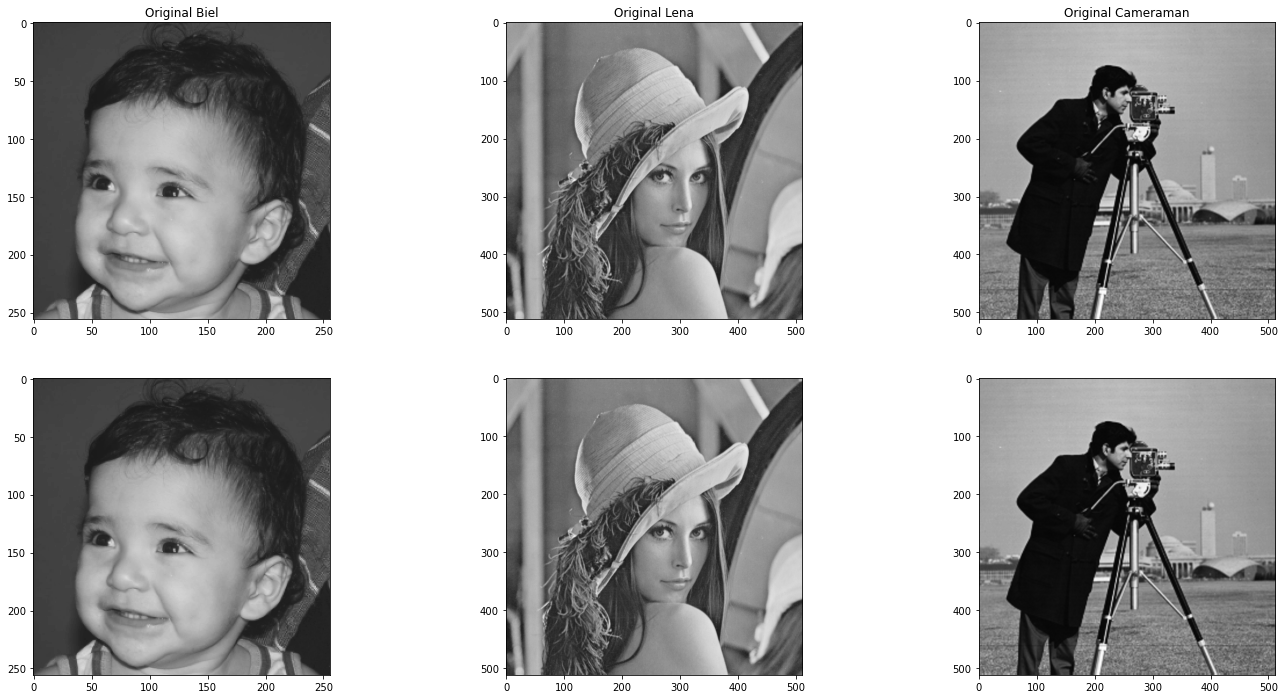


MÉDIA


<Figure size 432x288 with 0 Axes>

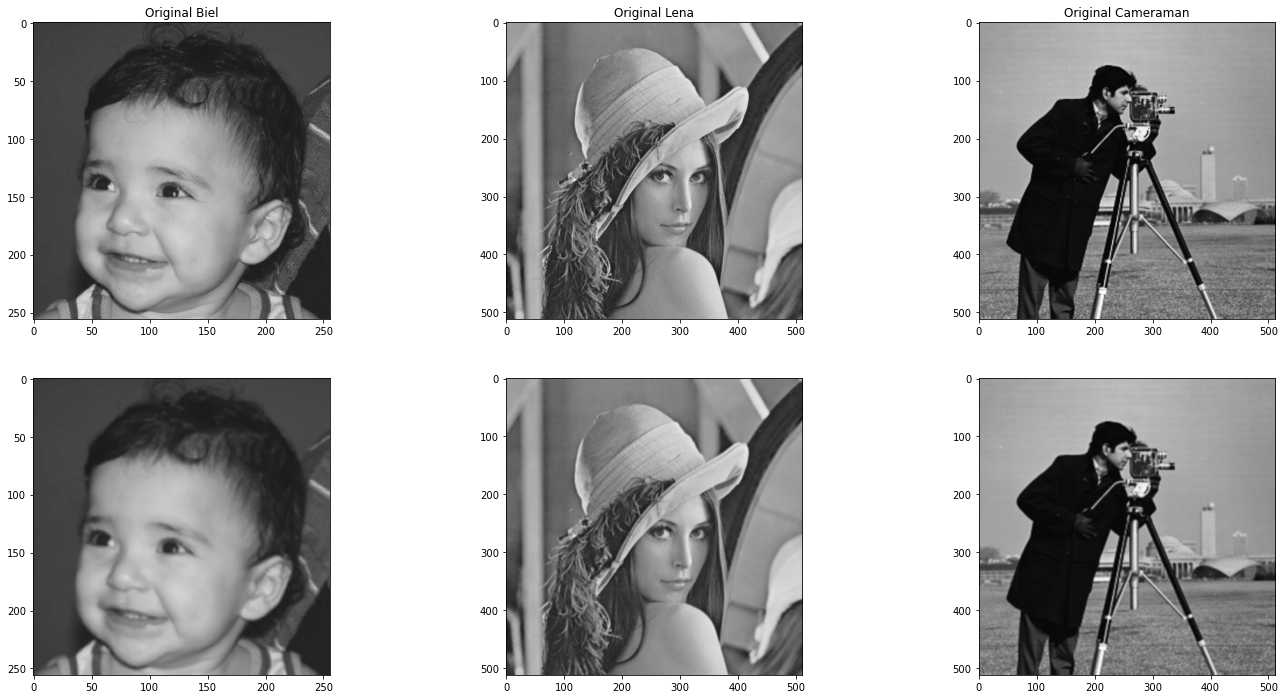


GAUSS


<Figure size 432x288 with 0 Axes>

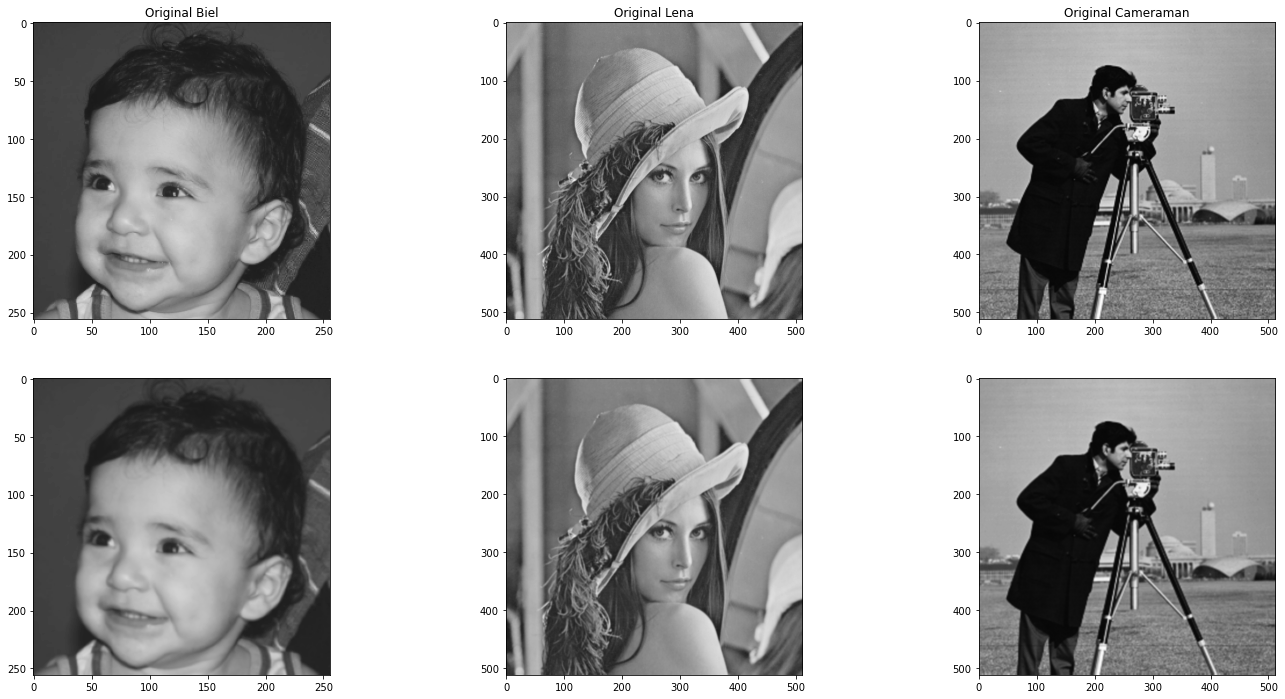


LAPLACIANO


<Figure size 432x288 with 0 Axes>

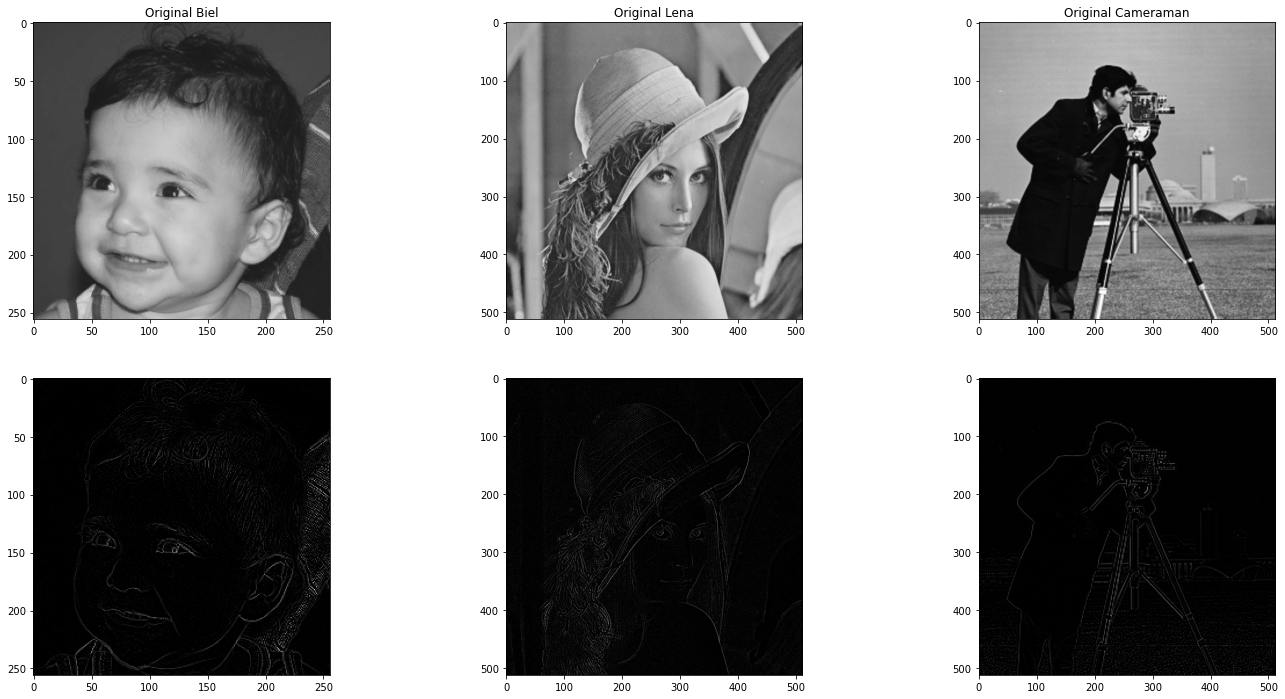


SOBELX


<Figure size 432x288 with 0 Axes>

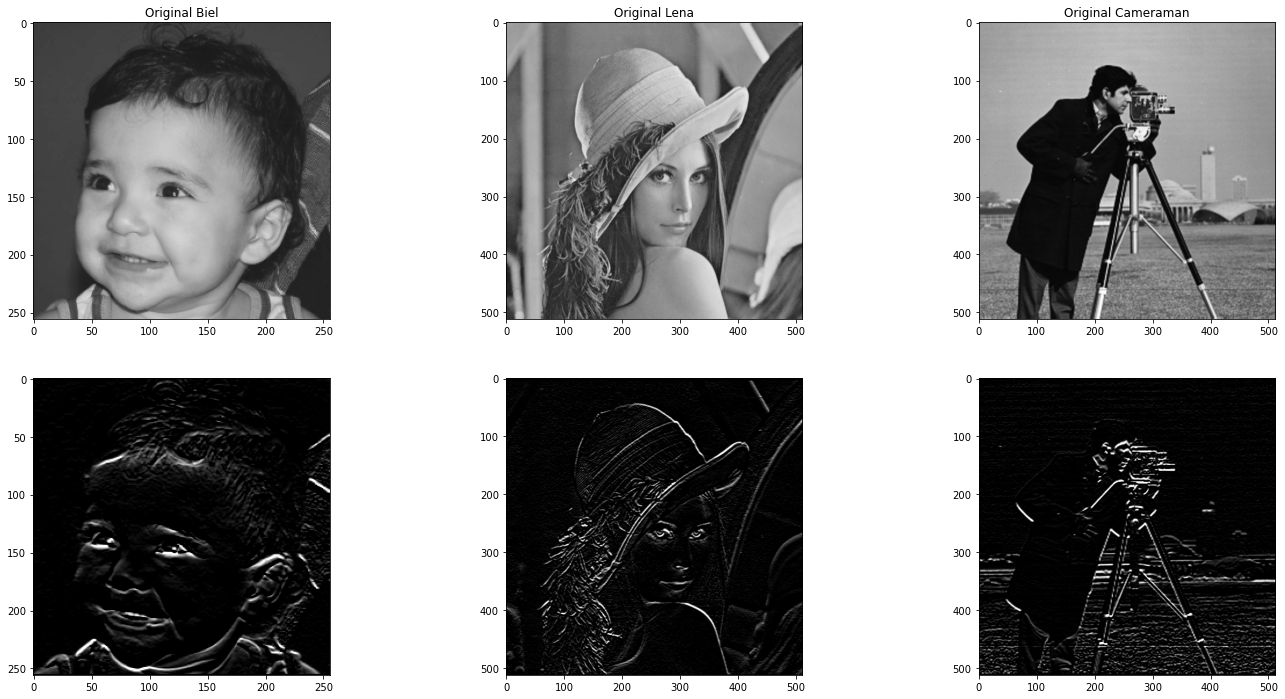


SOBELY


<Figure size 432x288 with 0 Axes>

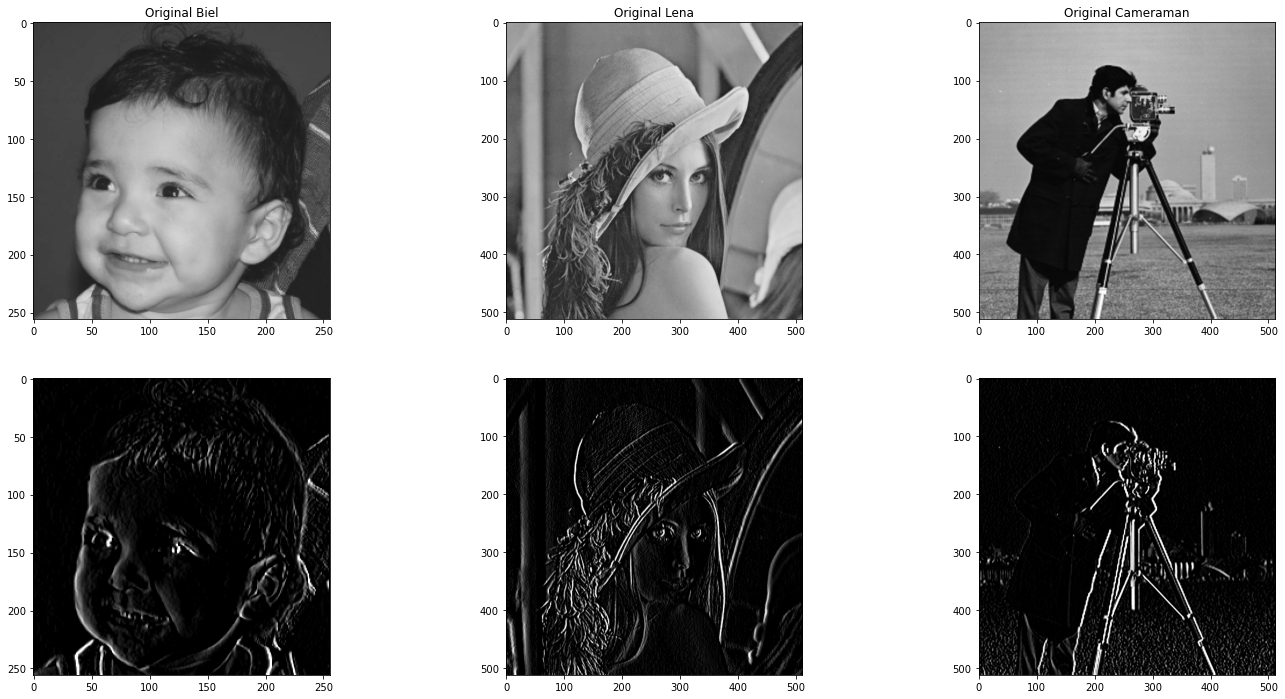


PREWITTX


<Figure size 432x288 with 0 Axes>

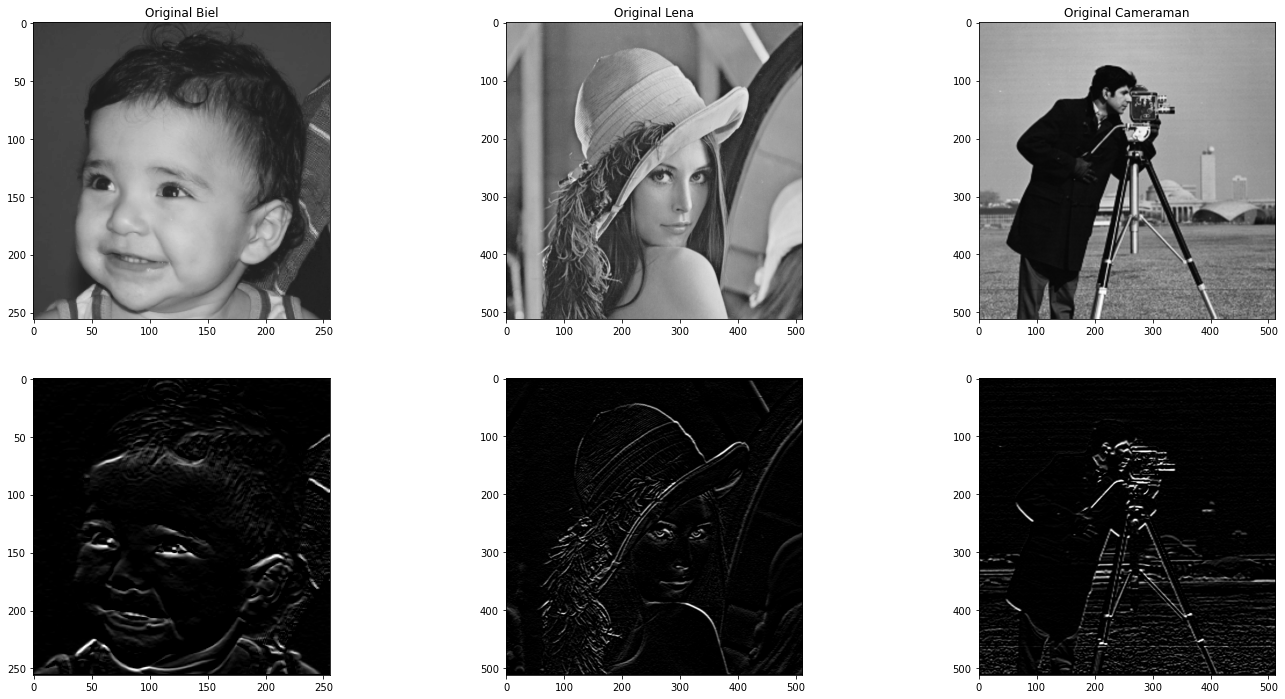


PREWITTY


<Figure size 432x288 with 0 Axes>

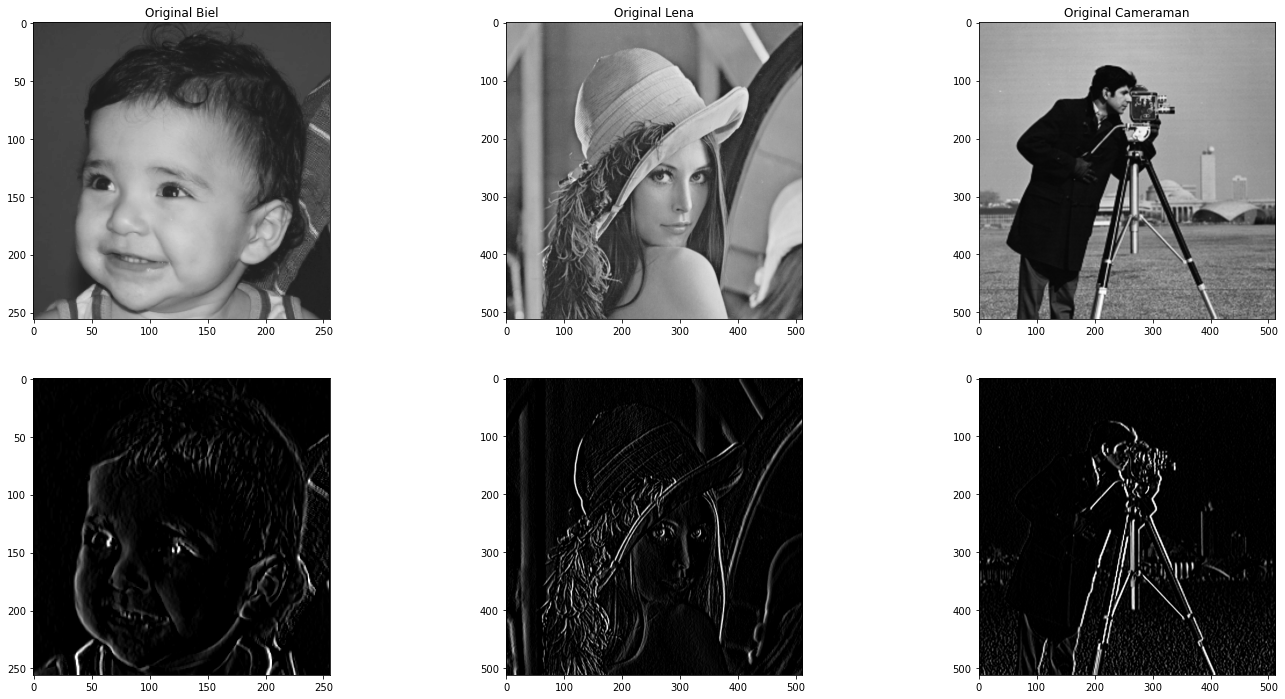


ROBERTSX


<Figure size 432x288 with 0 Axes>

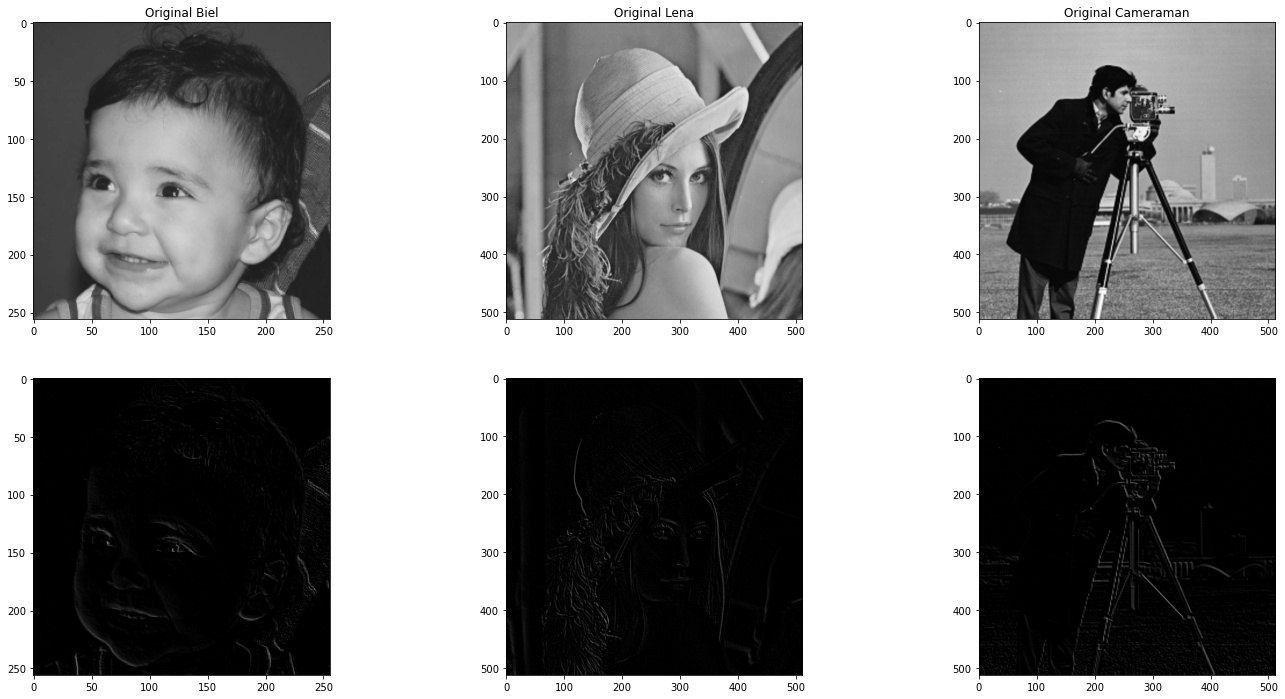


ROBERTSY


<Figure size 432x288 with 0 Axes>

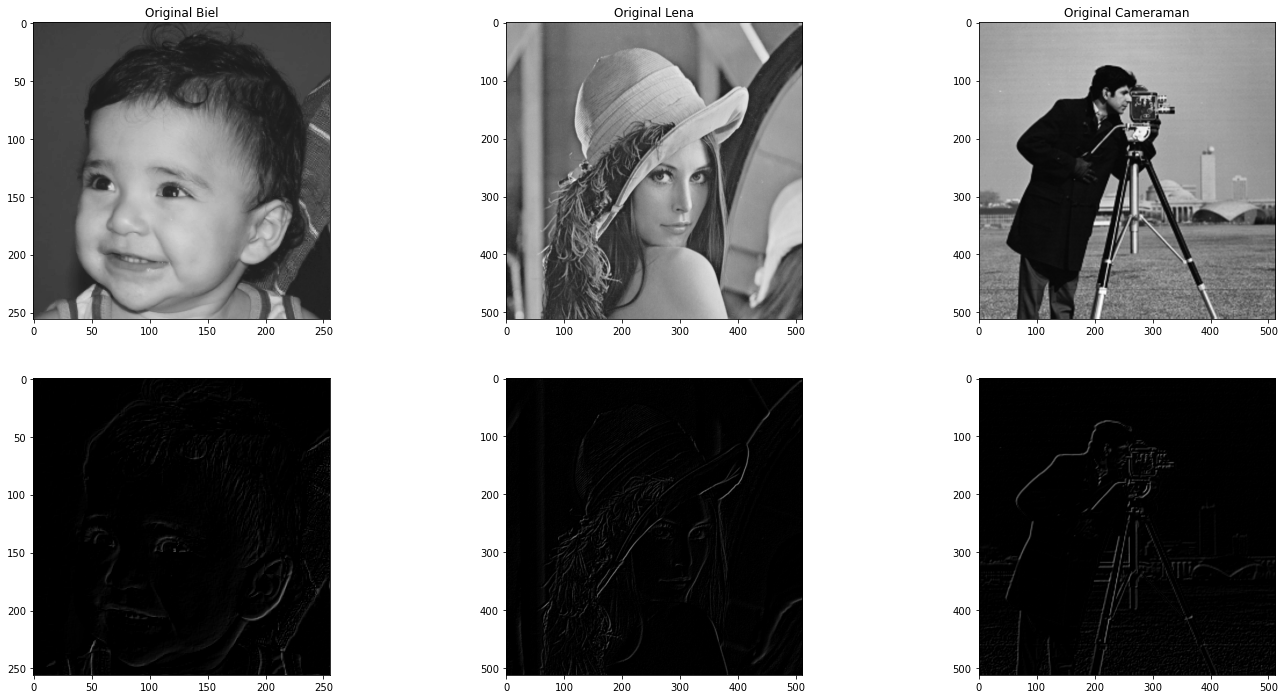


BOOST


<Figure size 432x288 with 0 Axes>

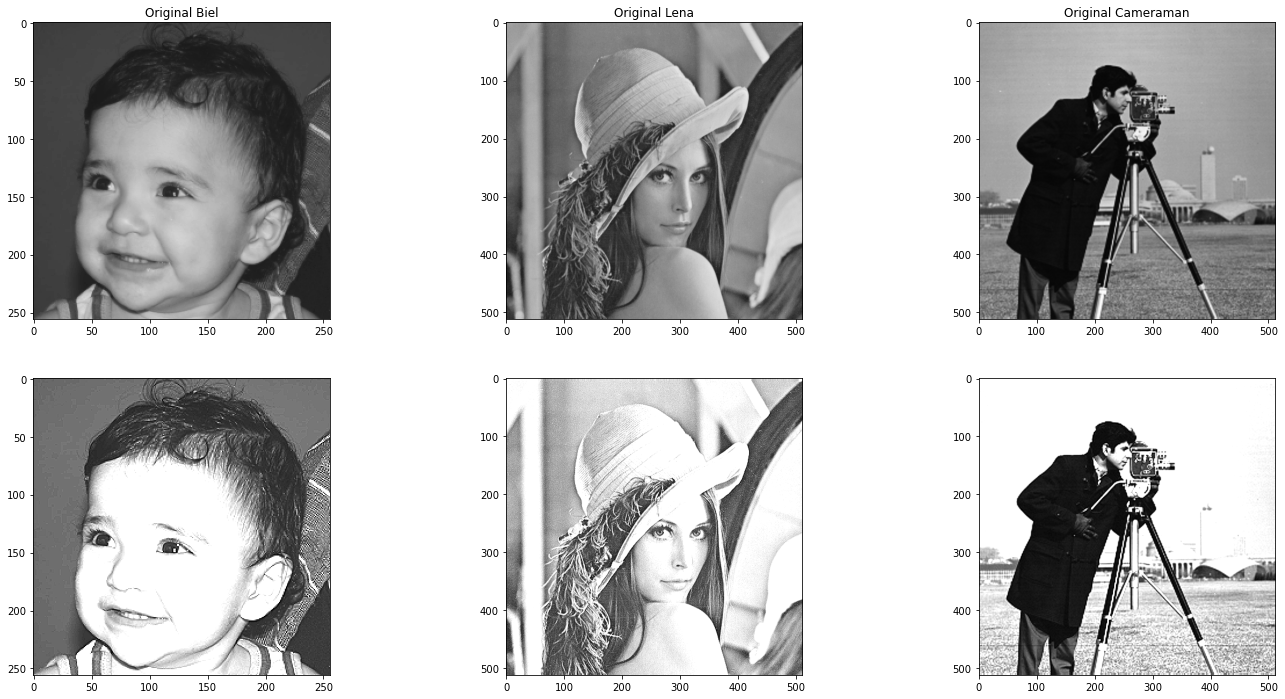


Laplaciano + Original


<Figure size 432x288 with 0 Axes>

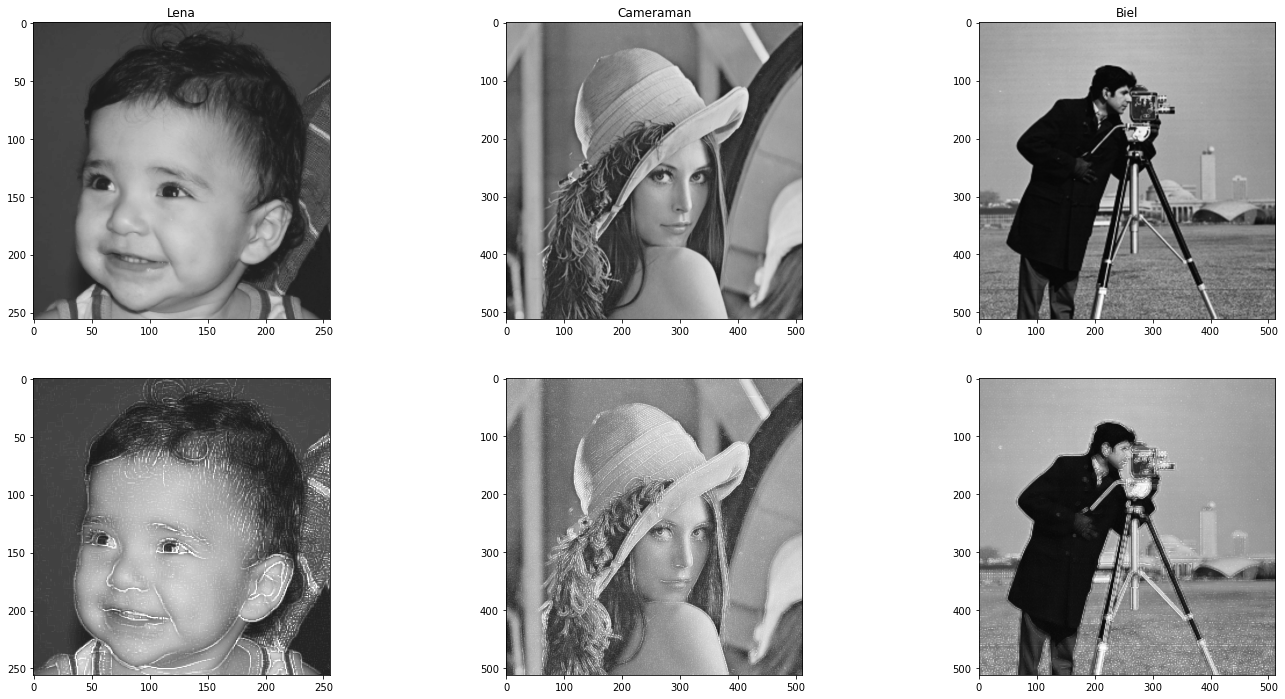

In [100]:
def main():
    print('IMPLEMENTAÇÃO DE FILTROS DE CONVOLUÇÃO UTILIZANDO OPENCV')
    execute_filters_convolution_opencv()
    # print('IMPLEMENTAÇÃO DE FILTROS DE CONVOLUÇÃO UTILIZANDO SCIPY')
    # execute_filters_convolution_scipy()
    # print('IMPLEMENTAÇÃO DE FILTROS DE CONVOLUÇÃO UTILIZANDO IMPLEMENTAÇÃO MANUAL')
    # execute_filters_convolution_manual()

if __name__ == "__main__":
    main()